## 2.08

Choques de Duracion Finita

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

In [2]:
class Particle:
    
    def __init__(self,r01,v01,a01,r02,v02,a02,t,m=1,radius=2,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r1 = r01
        self.v1 = v01
        self.a1 = a01
        
        self.R1 = np.zeros((len(t),len(r01)))
        self.V1 = np.zeros_like(self.R1)
        self.A1 = np.zeros_like(self.R1)
        
        self.r2 = r02
        self.v2 = v02
        self.a2 = a02
        
        self.R2 = np.zeros((len(t),len(r02)))
        self.V2 = np.zeros_like(self.R2)
        self.A2 = np.zeros_like(self.R2)
        
        self.radius = radius
        
    def Evolution(self,i):
        
        self.SetPosition1(i)
        self.SetVelocity1(i)
        self.SetPosition2(i)
        self.SetVelocity2(i)
        
        self.r1 += self.dt*self.v1
        self.v1 += self.dt*self.a1
        
        self.r2 += self.dt*self.v2
        self.v2 += self.dt*self.a2       
          
    def SetPosition1(self,i):
        self.R1[i] = self.r1

    def SetPosition2(self,i):
        self.R2[i] = self.r2
        
    def GetPosition1(self,scale=1):
        return self.R1[::scale]
    def GetPosition2(self,scale=1):
        return self.R2[::scale]
    
    def SetVelocity1(self,i):
        self.V1[i] = self.v1
    def SetVelocity2(self,i):
        self.V2[i] = self.v2

    def GetVelocity1(self,scale=1):
        return self.V1[::scale]
    def GetVelocity2(self,scale=1):
        return self.V2[::scale]  

    def CheckLimits1(self,Limits):
        
        for i in range(2):
        
            if self.r1[i] + self.radius > Limits[i][1] and self.v1[i] > 0.:
                self.v1[i] = -1.0*self.v1[i]
            if self.r1[i] - self.radius < Limits[i][0] and self.v1[i] < 0.:
                self.v1[i] = -1.0*self.v1[i]
                
    def CheckLimits2(self,Limits):
        
        for i in range(2):
        
            if self.r2[i] + self.radius > Limits[i][1] and self.v2[i] > 0.:
                self.v2[i] = -1.0*self.v2[i]
            if self.r2[i] - self.radius < Limits[i][0] and self.v2[i] < 0.:
                self.v2[i] = -1.0*self.v2[i]
                
    def CheckOthers(self):
        
        K=1
        
        distance = ((self.r1[0] - self.r2[0])**(2) + (self.r1[1] - self.r2[1])**(2))**(0.5)
        
        if distance <= 4:
            normal=np.cross(self.r1,self.r2)
            normalunitario = normal/(np.linalg.norm(normal))
            
            self.a1= K*((distance)**3)*normalunitario
            self.a2= K*((distance)**3)*normalunitario
            
        else:
            self.a1=np.array([0,0])
            self.a2=np.array([0,0])
        
                


In [3]:
def RunSimulation1(t,Wall):
    
    r01 = np.array([-15.,1.])
    v01 = np.array([10.,0.])
    a01 = np.array([0.,0.])
       
    r02 = np.array([0.,1.5])
    v02 = np.array([-3.,0.])
    a02 = np.array([0.,0.])
    
    p = Particle(r01,v01,a01,r02,v02,a02,t)
       
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        p.Evolution(it)
        p.CheckLimits1(Wall_)
        p.CheckLimits2(Wall_)
        p.CheckOthers()

    return p



In [4]:
Limits = np.array([[-20.,20.],[-20.,20.]])
Limits

array([[-20.,  20.],
       [-20.,  20.]])

In [5]:
dt = 0.05
tmax = 10
t = np.arange(0.,tmax,dt)
Particles = RunSimulation1(t,Limits)

Running simulation: 100%|████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 67.16 Steps/s]


In [6]:
scale = 1

In [7]:
t = t[::scale]

<IPython.core.display.Javascript object>


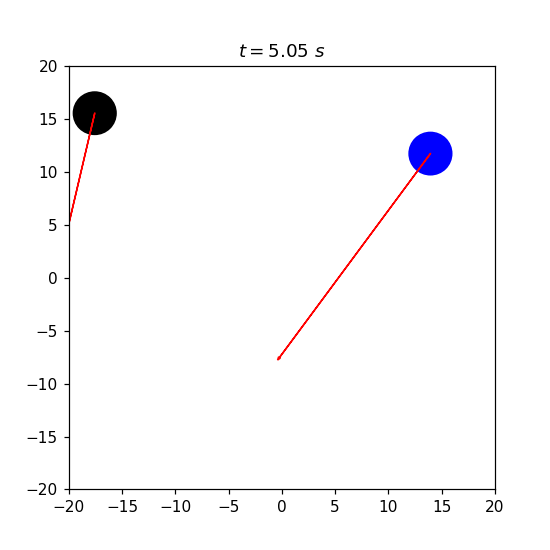

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    
    x1 = Particles.GetPosition1(scale)[i,0]
    y1 = Particles.GetPosition1(scale)[i,1]
    vx1 = Particles.GetVelocity1(scale)[i,0]
    vy1 = Particles.GetVelocity1(scale)[i,1]
    
    circle = plt.Circle((x1,y1),Particles.radius, fill=True, color='k')
    ax.add_patch(circle)
    
    ax.arrow(x1,y1,vx1,vy1,color='r',head_width=0.2,length_includes_head=True)
    
    
    x2 = Particles.GetPosition2(scale)[i,0]
    y2 = Particles.GetPosition2(scale)[i,1]
    vx2 = Particles.GetVelocity2(scale)[i,0]
    vy2 = Particles.GetVelocity2(scale)[i,1]
    
    circle = plt.Circle((x2,y2),Particles.radius, fill=True, color='b')
    ax.add_patch(circle)
    
    ax.arrow(x2,y2,vx2,vy2,color='r',head_width=0.2,length_includes_head=True)
    
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)